In [1]:
import warnings 
warnings.filterwarnings("ignore")

import sys
sys.dont_write_bytecode = True

In [2]:
import pandas as pd
import numpy as np
import json

from algorithms.clustering import hierarchical, kmeans , dbscan
from algorithms.associate_rule_mining import apriori, fpgrowth
from algorithms.forecasting import predictions

import utils.clustering as clustering_utils
import utils.forecasting as forecasting_utils
import utils.comparison as comparison_utils

In [5]:
ecommerce_df = pd.read_csv("./data/e-commerce-data.csv", encoding= 'unicode_escape')

In [4]:
clustering_df = clustering_utils.preprocess(ecommerce_df)
clustering_data   = clustering_utils.get_data(clustering_df)

kmeans_model = kmeans.KMeans(n_clusters = 4)
kmeans_labels = kmeans_model.get_labels(clustering_data)

dbscan_model = dbscan.DBSCAN(eps=0.15, min_samples=15)
dbscan_labels = dbscan_model.get_labels(clustering_data)

hierarchical_model = hierarchical.HierarchicalClustering(n_clusters= 4)
hierarchical_labels = hierarchical_model.get_labels(clustering_data)

Total number of outliers is: 434


In [5]:
print(len(kmeans_labels), len(set(kmeans_labels)))
print(len(dbscan_labels), len(set(dbscan_labels)))
print(len(hierarchical_labels), len(set(hierarchical_labels)))

3904 4
3904 4
3904 4


In [ ]:
customer_clusters_kmeans, customer_clusters_dbscan, customer_clusters_hierarchical = clustering_df, clustering_df, clustering_df
customer_clusters_kmeans['Cluster'] = kmeans_labels
customer_clusters_dbscan['Cluster'] = dbscan_labels
customer_clusters_hierarchical['Cluster'] = hierarchical_labels

In [ ]:
customer_clusters = comparison_utils.get_best_clusters(ecommerce_df, customer_clusters_kmeans, customer_clusters_dbscan, customer_clusters_hierarchical)

d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalpe

best cluster by kmeans


In [ ]:
apriori_model = apriori.Apriori()
associate_rules_apriori = apriori_model.get_associate_rules(ecommerce_df, customer_clusters)

fp_growth_model =fpgrowth.Fpgrowth()
associate_rules_fp_growth = fp_growth_model.get_associate_rules(ecommerce_df, customer_clusters)

associate_rules = comparison_utils.get_best_associate_rules(associate_rules_apriori, associate_rules_fp_growth)

d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\Mihir\IIT Indore BTech CSE\Academic\Sem6 Material\CS 354 Lab (Computational Intelligence)\Project\Code\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalpe

                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                    (PACK OF 72 RETROSPOT CAKE CASES)   
2                          (ALARM CLOCK BAKELIKE PINK)   
3                         (ALARM CLOCK BAKELIKE GREEN)   
4                         (ALARM CLOCK BAKELIKE GREEN)   
..                                                 ...   
585  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
586                   (PINK REGENCY TEACUP AND SAUCER)   
587                  (GREEN REGENCY TEACUP AND SAUCER)   
588                  (ROSES REGENCY TEACUP AND SAUCER)   
589                         (REGENCY CAKESTAND 3 TIER)   

                                           consequents zhang metric1  
0                    (PACK OF 72 RETROSPOT CAKE CASES)      0.203447  
1                        (60 TEATIME FAIRY CAKE CASES)      0.203447  
2                         (ALARM CLOCK BAKELIKE GREEN)      0.269169  
3                  

In [ ]:
associate_rules.to_csv("associate_rules.csv", index=False)

In [ ]:
prediction_df = forecasting_utils.prediction_preprocess(ecommerce_df)
predictions_model = predictions.Predictions()
predictions_model.get_associate_ruls(prediction_df)
prediction_df = predictions_model.get_predictions(ecommerce_df, prediction_df)

In [ ]:
prediction_df.to_csv("prediction.csv",index=False)

In [3]:
prediction_df = pd.read_csv("data/prediction.csv")
prediction_df['Customer basket'] = prediction_df['Customer basket'].apply(lambda x: eval(x))

In [ ]:
price_add_by_date = forecasting_utils.get_price_add_by_date(ecommerce_df, prediction_df)

In [ ]:
with open("price_add_by_date.json", "w") as outfile:
    json.dump(price_add_by_date, outfile)

In [7]:
with open('data/price_add_by_date.json') as json_file:
    price_add_by_date = json.load(json_file)

In [8]:
sales_by_date = forecasting_utils.time_series_preprocess(ecommerce_df, price_add_by_date)
print(sales_by_date.head())
forecasting_utils.visualize(sales_by_date)

ValueError: time data '0' does not match format '%Y-%m-%d %H:%M:%S'

305 (305, 1)


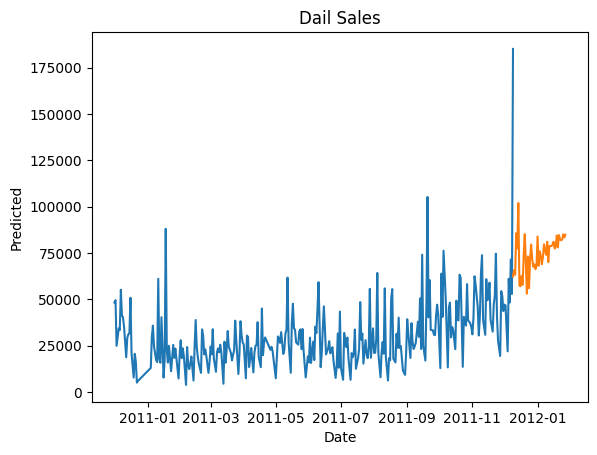

In [128]:
predictions_model = predictions.Predictions()
predictions_model.get_sales_by_date(sales_by_date, 10, 1, 10, 50)